<a href="https://colab.research.google.com/github/Ricardomanuel1/Maestria_Ciencia_de_Datos/blob/main/4.%20Estadistica/Short_Analysis_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of normality




In [ ]:
library(MASS)
library(ggplot2)

## Data Exploration

In [ ]:
head(Cars93,5)

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,⋯,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<fct>,<fct>
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,⋯,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,⋯,5,195,115,71,38,30.0,15,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,⋯,5,180,102,67,37,28.0,14,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,⋯,6,193,106,70,37,31.0,17,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,⋯,4,186,109,69,39,27.0,13,3640,non-USA,BMW 535i


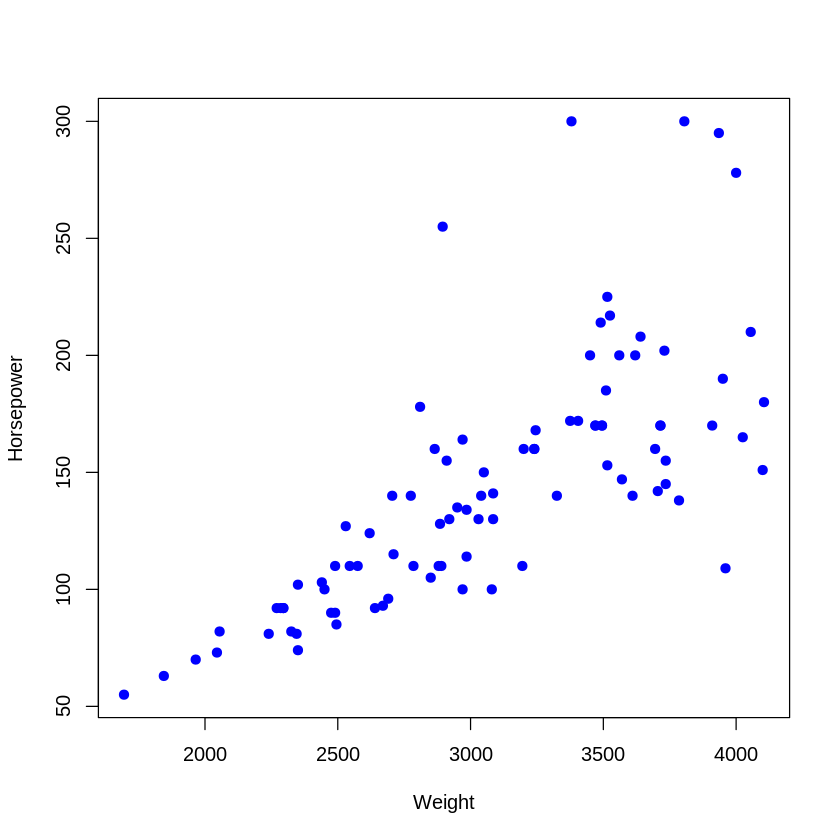

In [ ]:
# Horsepower : Y
# Weight : X
# Podemos construir un modelo lineal de la forma Y = alfa + beta*X

# ¿El valor de beta será positivo o negativo?
# Rpta: beta será positivo.
plot(Horsepower~Weight,col="blue",cex=1,pch=19,data=Cars93)

In [ ]:
cor(Cars93$Horsepower,Cars93$Weight)
# Por defecto R usa la correlación de Pearson.
# Sin embargo, Pearson debe usarse siempre que las variables analizadas
# sean cuantitativas contínuas y con distribución normal.

[1] 0.7387975

In [ ]:
cor(Cars93$Weight,Cars93$Horsepower)

[1] 0.7387975

In [ ]:
cor(Cars93$Weight,Cars93$Horsepower,method='pearson')

[1] 0.7387975

In [ ]:
cor(Cars93$Weight,Cars93$Horsepower,method='spearman')

[1] 0.8042527

In [ ]:
cor(Cars93$Weight,Cars93$Horsepower,method='kendall')

[1] 0.6300354

## By graphics visualization

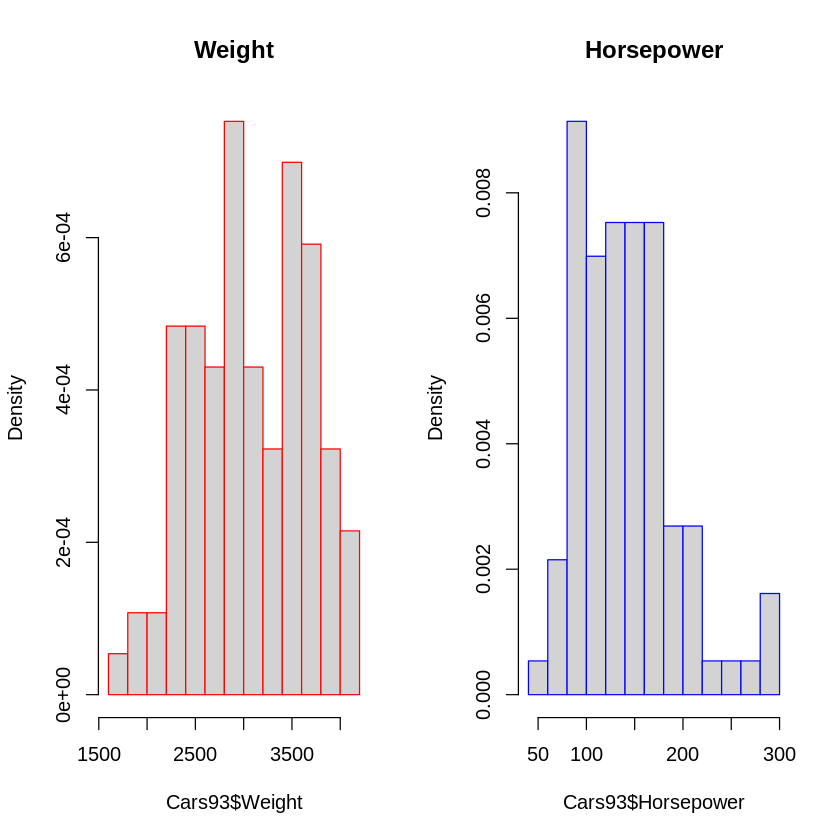

In [ ]:
par(mfrow = c(1, 2))
hist(Cars93$Weight, freq=F,breaks = 10, main = "Weight", border = "red")
hist(Cars93$Horsepower, freq=F,breaks = 10, main = "Horsepower", border = "blue")

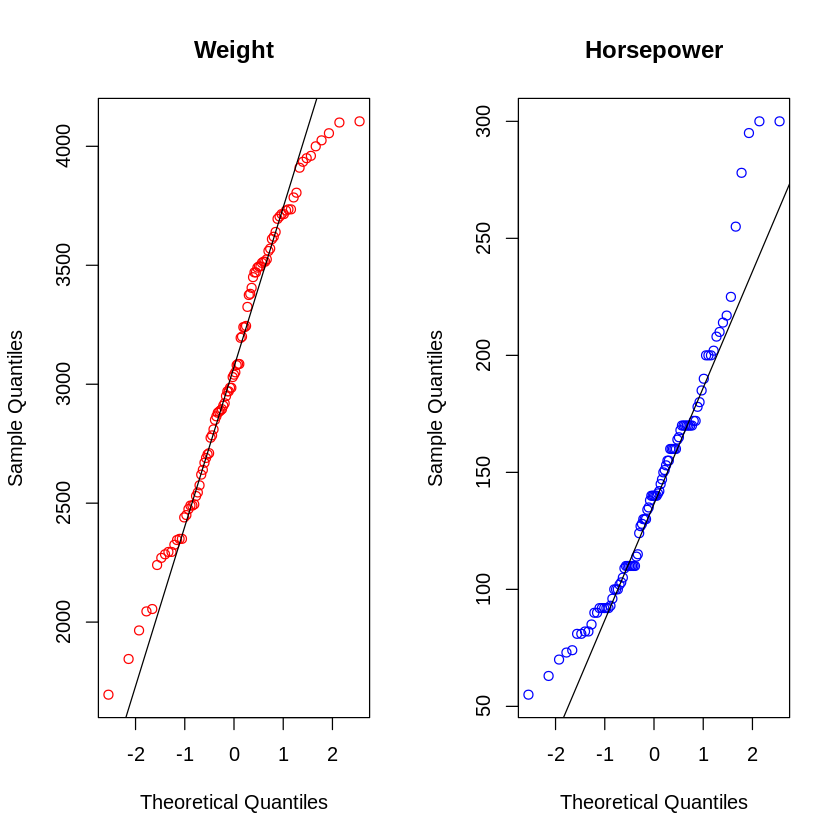

In [ ]:
par(mfrow = c(1, 2))
qqnorm(Cars93$Weight, main = "Weight", col = "red")
qqline(Cars93$Weight)
qqnorm(Cars93$Horsepower, main = "Horsepower", col = "blue")
qqline(Cars93$Horsepower)

## By analytical methods

In [ ]:
install.packages("moments")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(moments)

In [ ]:
# Asimetria
skewness(Cars93$Weight)

skewness(Cars93$Horsepower)


[1] -0.1413413

[1] 0.9363085

In [ ]:
# Curtosis
kurtosis(Cars93$Weight)-3
kurtosis(Cars93$Horsepower)-3

[1] -0.8736583

[1] 0.9882202

## By hypotheses contrast

H0: X es normal

Ha: X no es normal

Desición: Si p<0.05 entonces rechazamos H0.

In [ ]:
shapiro.test(Cars93$Weight)
shapiro.test(Cars93$Horsepower)


	Shapiro-Wilk normality test

data:  Cars93$Weight
W = 0.97432, p-value = 0.06337



	Shapiro-Wilk normality test

data:  Cars93$Horsepower
W = 0.93581, p-value = 0.0001916


Entonces:


*   Weight es normal.
*   Horsepower no es normal.



# How normalize a non-normal variable?

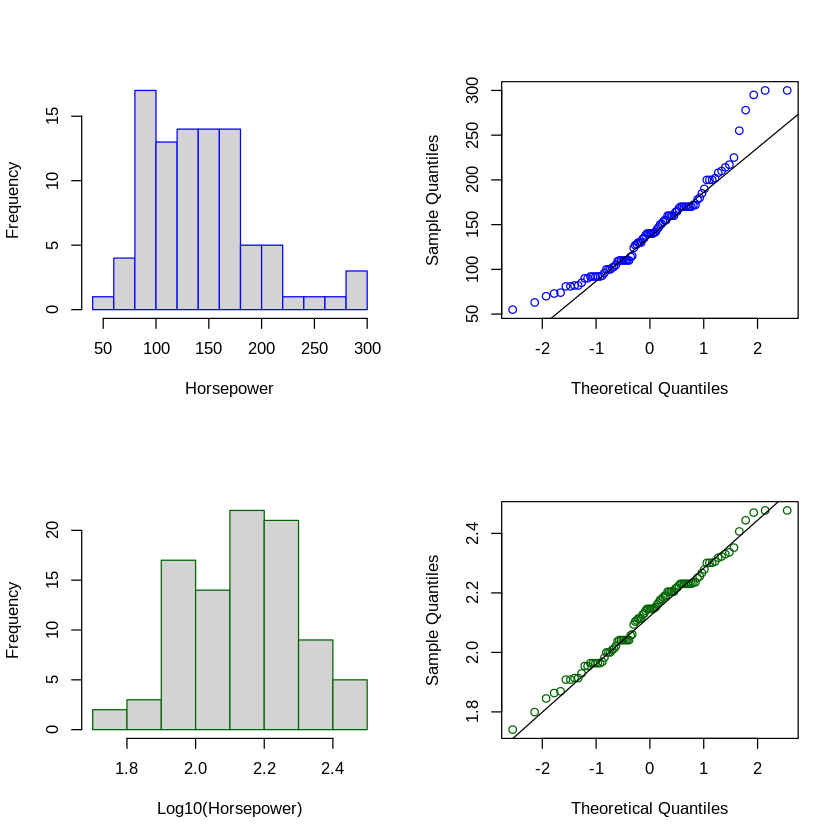

In [ ]:
par(mfrow = c(2, 2))
### grafico x
hist(Cars93$Horsepower, breaks = 10, main = "", xlab = "Horsepower", border = "blue")
qqnorm(Cars93$Horsepower, main = "", col = "blue")
qqline(Cars93$Horsepower)
### grafico log(x)
hist(log10(Cars93$Horsepower), breaks = 10, main = "", xlab = "Log10(Horsepower)", border = "darkgreen")
qqnorm(log10(Cars93$Horsepower), main = "", col = "darkgreen")
qqline(log10(Cars93$Horsepower))

In [ ]:
shapiro.test(log10(Cars93$Horsepower))


	Shapiro-Wilk normality test

data:  log10(Cars93$Horsepower)
W = 0.98761, p-value = 0.5333


# Comparison of correlations

In [ ]:
cor(Cars93$Horsepower,Cars93$Weight)

[1] 0.7387975

In [ ]:
cor(log10(Cars93$Horsepower),Cars93$Weight)

[1] 0.809672

In [ ]:
cor(log10(Cars93$Horsepower),log10(Cars93$Weight))

[1] 0.8251727

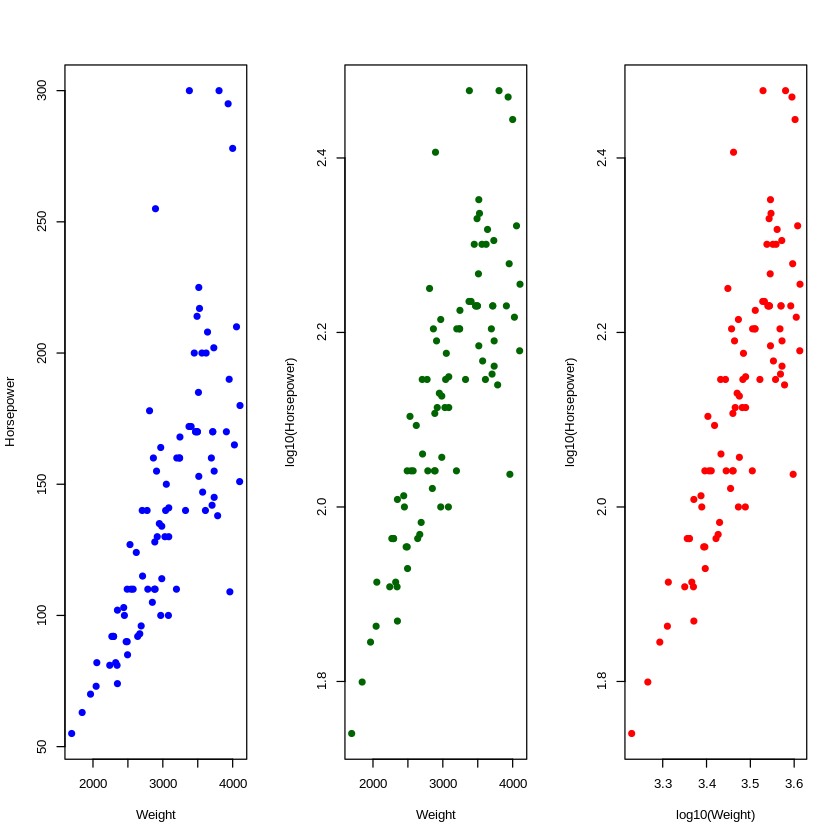

In [ ]:
par(mfrow = c(1, 3))
plot(Horsepower~Weight,col="blue",cex=1,pch=19,data=Cars93)
plot(log10(Horsepower)~Weight,col="darkgreen",cex=1,pch=19,data=Cars93)
plot(log10(Horsepower)~log10(Weight),col="red",cex=1,pch=19,data=Cars93)